In [ ]:
!pip install contractions
! python -m spacy download en_core_web_lg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP Enero 2024/clickbait_dataset.csv')
df.head()

,headline,clickbait
0,This Is What $1 USD Gets You In Food All Aroun...,1
1,Make These Easy Chicken Fajita Quesadillas At ...,1
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1
3,34 Online Shops Based In The Southeast You Sho...,1
4,US and France to work together for new Iran sa...,0


In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import contractions
import spacy

nlp = spacy.load('en_core_web_lg')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
stop_words_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def vectorize(texto):


    # haces todo el texto en minúsculas
    texto=texto.lower()

    #Aumentamos contracciones
    texto = contractions.fix(texto)

    # regex para caracteres especiales y números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)

    # tokenizar el texto
    texto_tokenized= word_tokenize(texto)

    # eliminar stopwords
    texto_no_stop = [token for token in texto_tokenized if token not in stop_words_en]

    # lematizar/unir las palabras procesadas nuevamente en una cadena
    final= [lemmatizer.lemmatize (word) for word in texto_no_stop]

    final = ' '.join(final)

    vector = nlp(final).vector

    return vector

In [ ]:
vectorize('this is a test')

array([ 6.1149e-02,  2.6721e-01,  2.1774e-01, -8.3348e-02, -2.6133e-01,
       -3.9486e-01,  1.5583e-01,  6.6879e-02,  2.0870e-01,  1.4234e+00,
       -1.0804e-02, -1.9882e-01,  3.9469e-01,  1.5281e-01, -5.3483e-02,
       -1.5038e-01,  7.6048e-02,  2.3503e+00, -5.4424e-01,  6.6730e-02,
        2.7928e-01,  1.9309e-02,  1.9913e-01,  1.5012e-01,  6.7792e-02,
        4.2240e-01,  6.4592e-02, -4.2206e-01,  3.6131e-01, -6.6089e-02,
       -8.7619e-03, -1.6498e-01,  1.0331e+00,  7.3610e-03,  4.9780e-02,
        3.5465e-01, -4.8489e-02,  4.3285e-01, -2.8666e-01,  1.7611e-02,
        3.6812e-01, -3.9362e-01, -1.2477e-02,  5.7482e-02,  1.1698e-01,
       -1.9191e-01, -3.2016e-02,  4.5280e-01,  1.8469e-01,  9.2373e-03,
        2.8163e-02, -7.1910e-02, -8.1790e-02, -2.2027e-01, -4.2260e-01,
       -1.5531e-02,  1.2467e-03, -1.1923e-01, -1.1214e-03, -8.8915e-02,
        1.1482e-01,  2.2836e-01,  2.0428e-02,  6.8038e-01,  5.8773e-01,
        5.3019e-01,  2.3912e-01, -3.6659e-01,  3.6670e-02,  5.14

In [ ]:
from tqdm import tqdm
nltk.download('punkt_tab')
tqdm.pandas()
df['vector'] = df['headline'].progress_apply(vectorize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
100%|██████████| 32000/32000 [03:35<00:00, 148.41it/s]


In [ ]:
df.head()

,headline,clickbait,vector
0,This Is What $1 USD Gets You In Food All Aroun...,1,"[-0.13304152, 0.24420139, 0.16230801, -0.17785..."
1,Make These Easy Chicken Fajita Quesadillas At ...,1,"[-0.12129935, 0.01960667, 0.26280832, 0.204994..."
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1,"[-0.108077, -0.01699775, -0.034307852, -0.2400..."
3,34 Online Shops Based In The Southeast You Sho...,1,"[0.1509604, 0.013627802, -0.0067799957, -0.065..."
4,US and France to work together for new Iran sa...,0,"[-0.13006389, -0.011753281, -0.03527286, -0.18..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X = df['vector']
X = np.concatenate(X, axis=0).reshape(-1,300)
y = df['clickbait']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    train_size=0.7,
                                                    random_state=101)

In [ ]:
import tensorflow as tf
print(f"Version: {tf.__version__}")
print(f"Hay GPU: {tf.config.list_physical_devices('GPU')}")

Version: 2.18.0
Hay GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=300))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,809 (280.50 KB)

 Trainable params: 71,809 (280.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=6, batch_size=10, validation_data=(X_test,y_test))

Epoch 1/6
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9214 - loss: 0.2199 - val_accuracy: 0.9424 - val_loss: 0.1494
Epoch 2/6
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9506 - loss: 0.1436 - val_accuracy: 0.9458 - val_loss: 0.1506
Epoch 3/6
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9572 - loss: 0.1198 - val_accuracy: 0.9519 - val_loss: 0.1496
Epoch 4/6
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9643 - loss: 0.0981 - val_accuracy: 0.9493 - val_loss: 0.1408
Epoch 5/6
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9707 - loss: 0.0847 - val_accuracy: 0.9490 - val_loss: 0.1783
Epoch 6/6
2240/2240 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9740 - loss: 0.0707 - val_accuracy: 0.9491 - val_loss: 0.1939


In [ ]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.933393,0.183098,0.942396,0.149355
1,0.947679,0.147493,0.945833,0.150584
2,0.957679,0.123161,0.951875,0.149561
3,0.962232,0.107406,0.949271,0.140814
4,0.967679,0.091210,0.948958,0.178310
5,0.970893,0.082234,0.949063,0.193899


<Axes: >

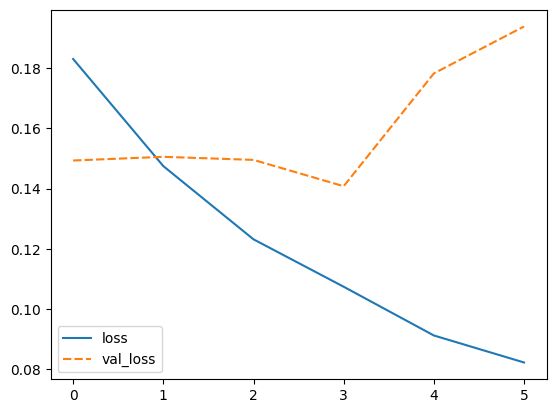

In [ ]:
import seaborn as sns
sns.lineplot(data=metrics[['loss', 'val_loss']])

<Axes: >

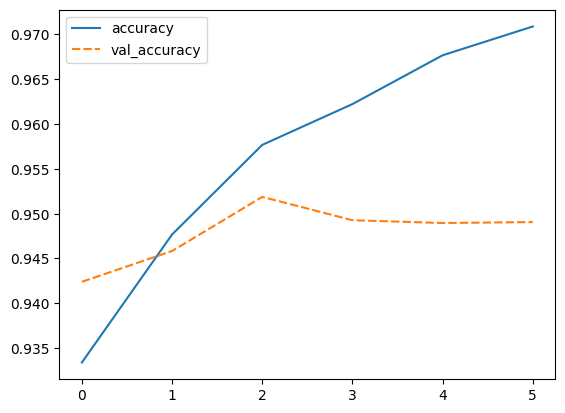

In [ ]:
sns.lineplot(data=metrics[['accuracy', 'val_accuracy']])

In [ ]:
y_pred = model.predict(X_test)
y_pred

300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[9.9999893e-01],
       [9.9999964e-01],
       [9.8032586e-15],
       ...,
       [9.9989331e-01],
       [4.9261928e-02],
       [1.1383487e-13]], dtype=float32)

In [ ]:
umbral = 0.5
y_pred = np.where(y_pred > umbral, 1, 0)
y_pred

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4805
           1       0.95      0.95      0.95      4795

    accuracy                           0.95      9600
   macro avg       0.95      0.95      0.95      9600
weighted avg       0.95      0.95      0.95      9600



<Axes: >

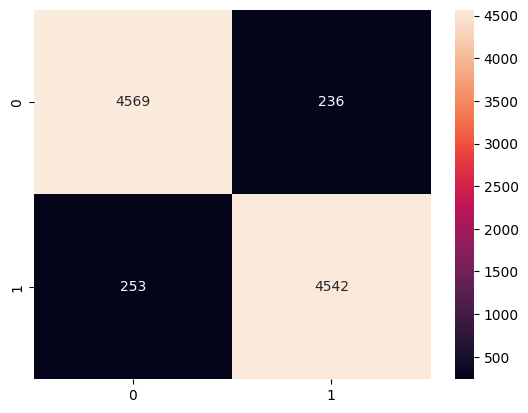

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,
            fmt='.0f')